In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
!pip install dlib
!pip install imutils

     |████████████████████████████████| 3.2MB 3.3MB/s eta 0:00:01
  Created wheel for dlib: filename=dlib-19.19.0-cp36-cp36m-linux_x86_64.whl size=4086274 sha256=1a76b533ad316ca5516627860dd435f504a9eddba53b72533638122ea10abaf9
  Stored in directory: /root/.cache/pip/wheels/96/ac/11/8aadec62cb4fb5b264a9b1b042caf415de9a75f5e165d79a51
Successfully built dlib
  Created wheel for imutils: filename=imutils-0.5.3-cp36-none-any.whl size=25851 sha256=863487886175abb6186988ac6e9a5e9de766f6be98eca5bb61c437118af84642
  Stored in directory: /root/.cache/pip/wheels/16/84/1f/bf88641293cda2c8be81a5c4b8ca973dd9125a6dc3767417fd
Successfully built imutils


In [ ]:
import numpy as np
import os
import imutils
import dlib # run "pip install dlib"
import cv2 # run "pip install opencv-python"

import imageio
from imutils import face_utils

In [ ]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
    	coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords

In [ ]:
def crop_and_save_image(img, img_path, write_img_path, img_name):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('../input/miraclvc1/shape_predictor_68_face_landmarks.dat')
    # load the input image, resize it, and convert it to grayscale

    image = cv2.imread(img_path)
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)
    if len(rects) > 1:
    	print( "ERROR: more than one face detected")
    	return
    if len(rects) < 1:
    	print( "ERROR: no faces detected")
    	return

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        name, i, j = 'mouth', 48, 68
        # clone = gray.copy()

        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
        roi = gray[y:y+h, x:x+w]
        roi = imutils.resize(roi, width = 250, inter=cv2.INTER_CUBIC)
#         print('cropped/' + write_img_path)
#         cv2.imwrite('cropped/' + write_img_path, roi)


In [ ]:
# os.listdir('../input/miraclvc1/dataset/dataset')
# predictor = dlib.shape_predictor('../input/miraclvc1/shape_predictor_68_face_landmarks.dat')

In [ ]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09', 'F10','F11','M01','M02','M04','M07','M08']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']
words_di = {i:words[i] for i in range(len(words))}

In [ ]:
# if not os.path.exists('cropped'):
#     os.mkdir('cropped')

### Uncomment for creating a cropped version of the dataset

Just to be clear, this is what cropped version for each instance looks like :

![Demo](https://i.imgur.com/z6YIvFL.png)

Note : This will take some time to execute depending on the number of users.

In [ ]:
import shutil

def crop_one_person():
    os.mkdir('cropped')
    people = ['F01']
    data_types = ['words']
    folder_enum = ['01']
    instances = ['01']

    i = 1
    for person_ID in people:
        if not os.path.exists('cropped/' + person_ID ):
            os.mkdir('cropped/' + person_ID + '/')

        for data_type in data_types:
            if not os.path.exists('cropped/' + person_ID + '/' + data_type):
                os.mkdir('cropped/' + person_ID + '/' + data_type)

            for phrase_ID in folder_enum:
                if not os.path.exists('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID):
                    # F01/phrases/01
                    os.mkdir('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID)

                for instance_ID in instances:
                    # F01/phrases/01/01
                    directory = '../input/miraclvc1/dataset/dataset/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
                    dir_temp = person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID + '/'
    #                 print(directory)
                    filelist = os.listdir(directory)
                    if not os.path.exists('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID):
                        os.mkdir('cropped/' + person_ID + '/' + data_type + '/' + phrase_ID + '/' + instance_ID)

                        for img_name in filelist:
                            if img_name.startswith('color'):
                                image = imageio.imread(directory + '' + img_name)
                                crop_and_save_image(image, directory + '' + img_name,
                                                    dir_temp + '' + img_name, img_name)

    print(f'Iteration : {i}')
    i += 1
    shutil.rmtree('cropped')

In [ ]:
# import time

# times = 0
# for _ in range(7):
#     t1 = time.time()
#     crop_one_person()
#     t2 = time.time()
#     times += (t2 - t1)

# print("Average time over 7 iterations : ", times/7)

Checking whether the cropped sequences are in the right directory

In [ ]:
# os.listdir('../input/cropped-data/cropped')

In [ ]:
max_seq_length = 22

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []


MAX_WIDTH = 100
MAX_HEIGHT = 100

In [ ]:
from skimage.transform import resize
import time

In [ ]:
t1 = time.time()
UNSEEN_VALIDATION_SPLIT = ['F07', 'M02']
UNSEEN_TEST_SPLIT = ['F04']

directory = "../input/cropped-data/cropped"

for person_id in people:
    tx1 = time.time()
    for data_type in data_types:
        for word_index, word in enumerate(folder_enum):
#             print(f"Word : '{words[word_index]}'")
            for iteration in instances:
                path = os.path.join(directory, person_id, data_type, word, iteration)
                filelist = sorted(os.listdir(path + '/'))
                sequence = []
                for img_name in filelist:
                    if img_name.startswith('color'):
                        image = imageio.imread(path + '/' + img_name)
                        image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                        image = 255 * image
                        # Convert to integer data type pixels.
                        image = image.astype(np.uint8)
                        sequence.append(image)
                pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))]
                sequence.extend(pad_array * (max_seq_length - len(sequence)))
                sequence = np.array(sequence)

                if person_id in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                elif person_id in UNSEEN_VALIDATION_SPLIT:
                    X_val.append(sequence)
                    y_val.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')

t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those cropped lip regions : {t2 - t1} secs.")

Finished reading images for person F01. Time taken : 5.517017364501953 secs.
Finished reading images for person F02. Time taken : 5.167886734008789 secs.
Finished reading images for person F04. Time taken : 8.661330938339233 secs.
Finished reading images for person F05. Time taken : 7.227848768234253 secs.
Finished reading images for person F06. Time taken : 7.28635573387146 secs.
Finished reading images for person F07. Time taken : 7.498943090438843 secs.
Finished reading images for person F08. Time taken : 5.634554624557495 secs.
Finished reading images for person F09. Time taken : 5.862581729888916 secs.
Finished reading images for person F10. Time taken : 5.547099351882935 secs.
Finished reading images for person F11. Time taken : 4.696088552474976 secs.
Finished reading images for person M01. Time taken : 6.209230661392212 secs.
Finished reading images for person M02. Time taken : 6.667354583740234 secs.
Finished reading images for person M04. Time taken : 6.540194511413574 secs.


In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1200, 22, 100, 100)
(200, 22, 100, 100)
(100, 22, 100, 100)


In [ ]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1200,)
(200,)
(100,)


## Normalization and stuff

In [ ]:
def normalize_it(X):
    v_min = X.min(axis=(2, 3), keepdims=True)
    v_max = X.max(axis=(2, 3), keepdims=True)
    X = (X - v_min)/(v_max - v_min)
    X = np.nan_to_num(X)
    return X

In [ ]:
from keras.utils import np_utils, generic_utils

Using TensorFlow backend.


In [ ]:
X_train = normalize_it(X_train)
X_val = normalize_it(X_val)
X_test = normalize_it(X_test)

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_val = np_utils.to_categorical(y_val, 10)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
X_train = np.expand_dims(X_train, axis=4)
X_val = np.expand_dims(X_val, axis=4)
X_test = np.expand_dims(X_test, axis=4)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1200, 22, 100, 100, 1)
(200, 22, 100, 100, 1)
(100, 22, 100, 100, 1)


## Model Building and predicting

In [ ]:
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from keras.utils import plot_model
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

### Vanilla 3D CNNs

In [ ]:
# model = Sequential()

# # 1st layer group
# model.add(Conv3D(64, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model.add(Conv3D(256, (2, 2, 2), activation='relu', strides=1))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model.add((Flatten()))

# # # FC layers group
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(.5))

# model.add(Dense(10, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
# model.summary()

* ### 3D CNNs + LSTM

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

shape = model.get_output_shape_at(0)
model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))

# LSTMS - Recurrent Network Layer
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.5))

model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
# model.summary()

* ### 3D CNNs + GRUs

In [ ]:
# model = Sequential()

# # 1st layer group
# model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
# model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# shape = model.get_output_shape_at(0)
# model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))

# # Gated Recurrent Unit - Recurrent Network Layer
# model.add(GRU(32, return_sequences=True))
# model.add(Dropout(.5))

# model.add((Flatten()))

# # # FC layers group
# model.add(Dense(2048, activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(.5))

# model.add(Dense(10, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
# model.summary()

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Train on 1200 samples, validate on 200 samples
Epoch 1/45
1200/1200 [==============================] - 11s 10ms/step - loss: 2.3127 - accuracy: 0.0983 - val_loss: 2.2910 - val_accuracy: 0.1000
Epoch 2/45
1200/1200 [==============================] - 11s 9ms/step - loss: 2.2986 - accuracy: 0.1133 - val_loss: 2.2548 - val_accuracy: 0.2000
Epoch 3/45
1200/1200 [==============================] - 10s 8ms/step - loss: 2.2710 - accuracy: 0.1292 - val_loss: 2.2453 - val_accuracy: 0.1900
Epoch 4/45
1200/1200 [==============================] - 10s 9ms/step - loss: 2.2408 - accuracy: 0.1467 - val_loss: 2.2747 - val_accuracy: 0.1950
Epoch 5/45
1200/1200 [==============================] - 10s 8ms/step - loss: 1.9680 - accuracy: 0.2617 - val_loss: 1.7942 - val_accuracy: 0.3600
Epoch 6/45
1200/1200 [==============================] - 10s 8ms/step - loss: 1.5686 - accuracy: 0.4042 - val_loss: 1.7533 - val_accuracy: 0.4100
Epoch 7/45
1200/1200 [==============================] - 11s 9ms/step - loss: 1.165

In [ ]:
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True)

### Training & Validation accuracy values

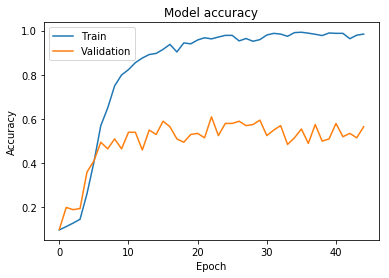

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Training & Validation loss values

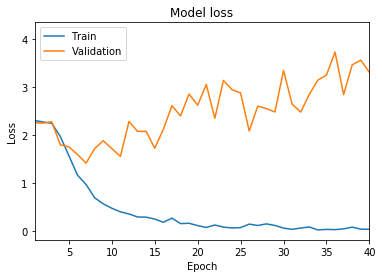

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(1, 40)
# plt.ylim(0, 3)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
ypred = model.predict(X_test)

In [ ]:
predicted_words = [words[i] for i in np.argmax(ypred, axis=1)]
actual_words = [words[i] for i in np.argmax(y_test, axis=1)]

In [ ]:
correct = 0
for p, a in zip(predicted_words, actual_words):
    if p == a:
        correct += 1
#     print(f"Predicted : {p} \t Actual : {a}")

accuracy = correct/len(actual_words)
print(f"Accuracy = {accuracy} on completely unseen data")

Accuracy = 0.32 on completely unseen data
